In [29]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max.columns',None)
sns.set_style('white')

In [30]:
# import the data
data = pd.read_csv('train_F3fUq2S.csv')

In [31]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [32]:
# check the data
print("Shape of the data",data.shape)
print("Check for Null Values",data.isnull().sum().sum())

Shape of the data (1888, 22)
Check for Null Values 0


In [33]:
data.describe(include='all')

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,NaN,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,NaN,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,NaN,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,NaN,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,NaN,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589


### EDA 

#### Target Variable - Distribution

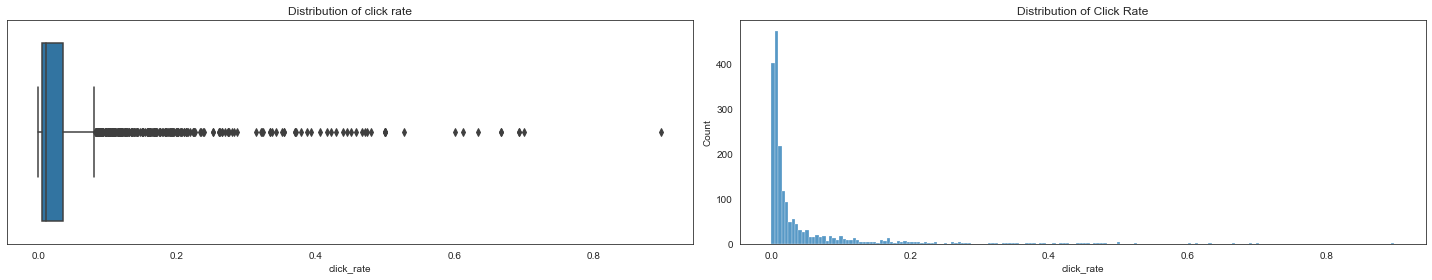

In [34]:
# distribution of Click rate
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.title("Distribution of click rate")
sns.boxplot(data=data,x='click_rate')

plt.subplot(1,2,2)
plt.title("Distribution of Click Rate")
sns.histplot(data=data,x='click_rate')

plt.tight_layout()
plt.show()

In [35]:
# Drop Campaign ID - As this is an unique identifer
# Drop Click Rate as it is target variable

#### Indipendent Variables

In [36]:
X = data.drop(['click_rate','campaign_id'], axis =1)
y = data['click_rate']

In [37]:
cat_vars = X.select_dtypes(include='O').columns.to_list()
num_vars = X.select_dtypes(exclude='O').columns.to_list()

In [38]:
ordinal_val = [var for var in num_vars if len(X[var].unique()) < 10]
cont_vars = [var for var in num_vars if len(X[var].unique()) > 20]

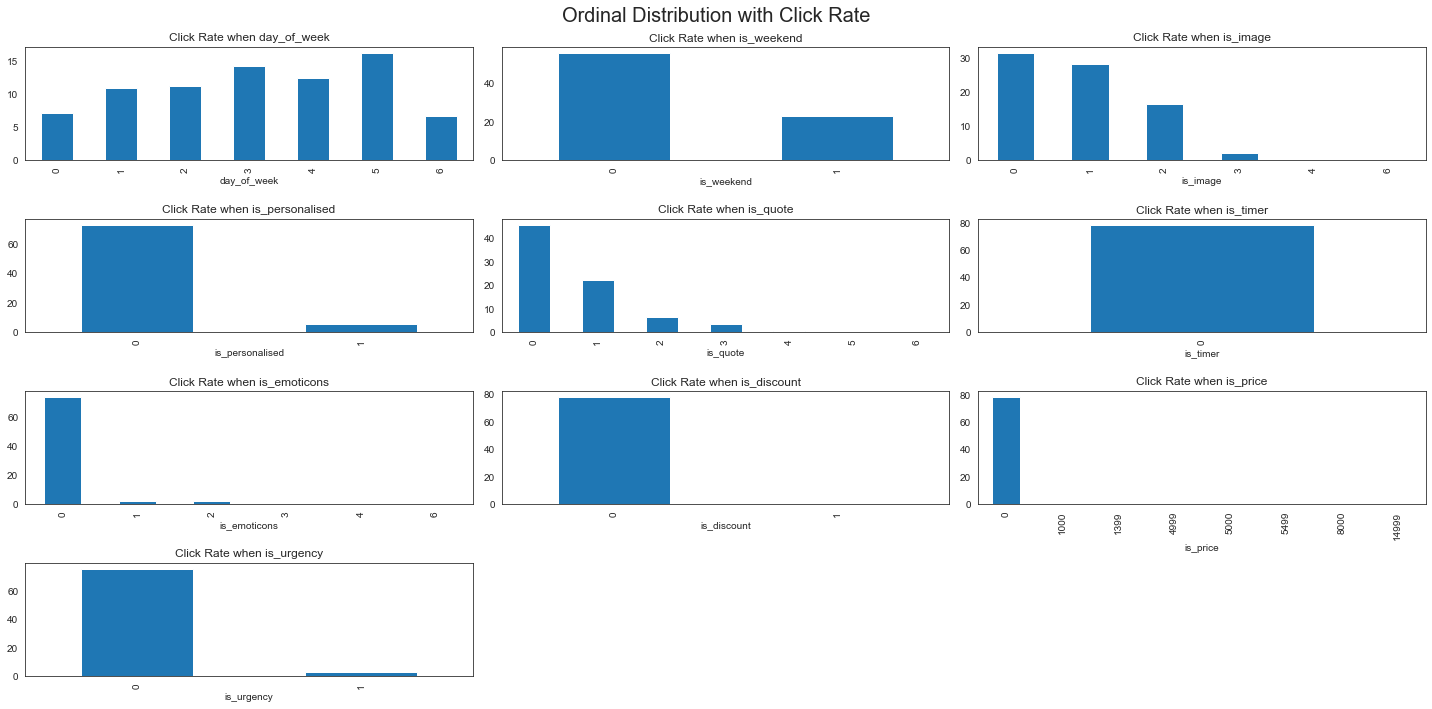

In [39]:
plt.figure(figsize=(20,10))
c=1
for var in ordinal_val:
    plt.subplot(4,3,c)
    data.groupby(var).sum()['click_rate'].plot(kind='bar')
    plt.title(f"Click Rate when {var}")
    c=c+1
plt.suptitle("Ordinal Distribution with Click Rate",fontsize=20)
plt.tight_layout()
plt.show()

Number of Unique Campaigns: 1888
Number of Unique Senders: 12



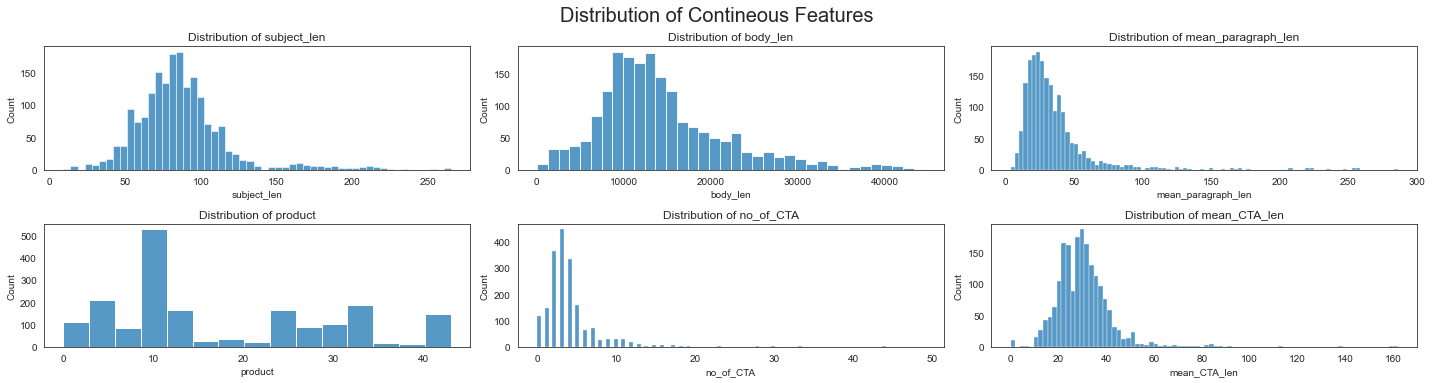

In [40]:
# Unique identifier of the campaign
print("Number of Unique Campaigns:",len(data['campaign_id'].unique()))
print("Number of Unique Senders:",len(data['sender'].unique()))
print()
plt.figure(figsize=(20,10))
c=1
for var in cont_vars:
    plt.subplot(4,3,c)
    sns.histplot(data=data, x = var)
    plt.title(f"Distribution of {var}")
    c=c+1
    
plt.suptitle("Distribution of Contineous Features", fontsize=20)
plt.tight_layout()
plt.show()

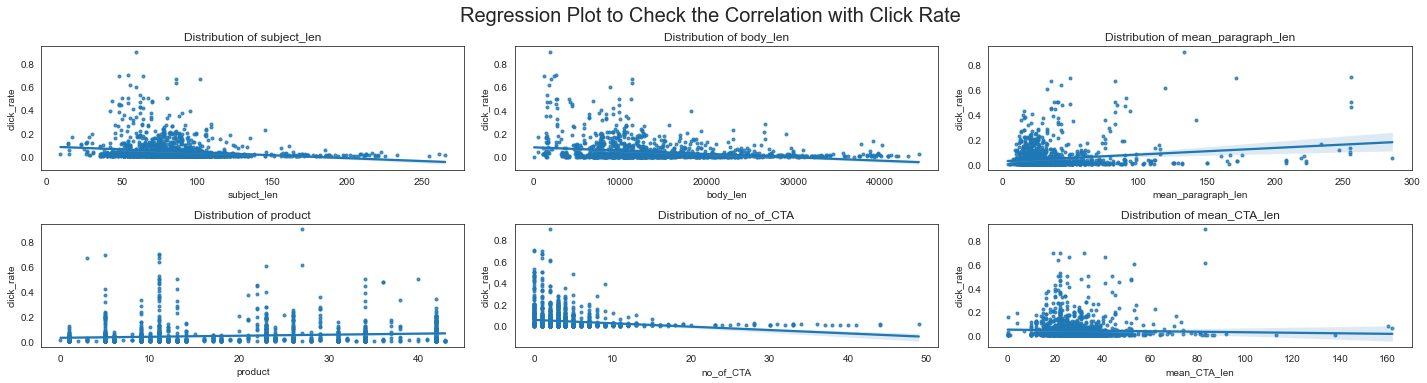

In [41]:
plt.figure(figsize=(20,10))
c=1
for var in cont_vars:
    plt.subplot(4,3,c)
    sns.regplot(data=data, x = var, y ='click_rate',marker='.')
    plt.title(f"Distribution of {var}")
    c=c+1

plt.suptitle("Regression Plot to Check the Correlation with Click Rate", fontsize=20)
plt.tight_layout()
plt.show()

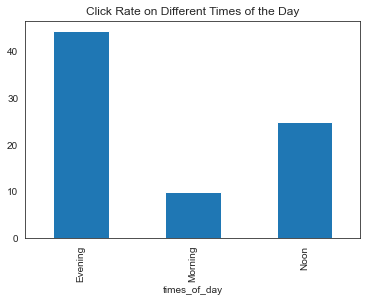

In [42]:
data.groupby(cat_vars).sum()['click_rate'].plot(kind='bar')
plt.title("Click Rate on Different Times of the Day")
plt.show()